In [1]:
import sys
sys.path.append('../src')

import os
import torch
import glob
import numpy as np
import torch.optim as optim
import torch.nn.functional as F

import ocr_data_set
import ocr_model
from ocr_data_loader import load_data
from ocr_utils import *
from ocr_image_transformations import *
from ocr_model import OCRModel

from torchvision import transforms
from torch import nn
import torchvision
from PIL import Image


In [12]:
batch_sizes = [10, 32, 50, 128, 1024] 

losses1 = [91.22079467773438, 59.1905517578125, 41.44813919067383, 75.75853729248047, 43.490142822265625, 106.8606948852539, 44.116798400878906, 41.46561050415039, 114.0480728149414, 88.35597229003906, 47.357086181640625, 138.03611755371094, 46.62858200073242, 41.75364303588867, 216.34524536132812, 54.36265182495117, 39.706275939941406, 46.31472396850586, 53.89043045043945, 143.6120147705078, 79.51773834228516, 82.56029510498047, 40.96590805053711, 130.53330993652344, 126.98274230957031, 72.73787689208984, 49.83222579956055, 103.35485076904297, 109.4463882446289, 39.73024368286133, 265.7909240722656, 124.24446105957031, 129.5101776123047, 40.13751220703125, 43.1273307800293, 161.6824188232422, 58.963592529296875, 46.74886703491211, 42.727996826171875, 116.38213348388672, 35.27418899536133, 44.32555389404297, 42.3638801574707, 63.475494384765625, 48.66901779174805, 66.34869384765625, 137.19110107421875, 132.3525390625, 45.31727600097656, 312.0821228027344, 45.601165771484375, 69.09452819824219, 40.867122650146484, 79.32539367675781, 77.39741516113281, 205.2183074951172, 70.99012756347656, 44.079078674316406, 155.3105926513672, 84.78302001953125, 40.0755729675293, 47.343563079833984, 62.6258659362793, 44.44560241699219, 47.239105224609375, 90.07676696777344, 47.802303314208984, 45.233219146728516, 59.04256820678711, 57.8891487121582, 132.44728088378906, 54.53595733642578, 135.3704071044922, 39.970802307128906, 43.412506103515625, 52.096717834472656, 69.56172943115234, 41.1644172668457, 47.9632453918457, 134.49546813964844, 62.125789642333984, 45.212642669677734, 39.86525344848633, 84.48515319824219, 127.26246643066406, 74.50963592529297, 196.4786376953125, 182.5524139404297, 56.20724105834961, 142.8217315673828, 44.97574996948242, 184.16563415527344, 111.90279388427734, 37.459136962890625, 119.7999038696289, 46.13438415527344, 44.042083740234375, 43.647186279296875, 46.23460006713867, 91.13874816894531, 104.2016372680664, 42.25288391113281, 51.338600158691406, 75.81827545166016, 43.458038330078125, 48.00020980834961, 138.02767944335938, 152.49913024902344, 106.65925598144531, 58.303199768066406, 40.259029388427734, 86.52367401123047, 43.03265380859375, 37.957008361816406, 45.5694694519043, 38.29667282104492, 166.98605346679688, 43.65263748168945, 51.007389068603516, 172.62356567382812, 48.326786041259766, 91.4169692993164, 72.18572998046875, 84.5450439453125, 47.97258377075195, 85.7442855834961, 98.36141204833984, 178.0135955810547, 62.67037582397461, 174.80160522460938, 73.48450469970703, 44.349525451660156, 129.62464904785156, 358.8039245605469, 47.62309646606445, 45.83395004272461, 54.32716751098633, 53.98359298706055, 46.71868133544922, 54.879310607910156, 42.06013107299805, 58.794219970703125, 52.53887939453125, 60.33572006225586, 139.66314697265625, 193.55322265625, 35.368953704833984, 41.508941650390625, 88.51202392578125, 35.728271484375, 46.29462432861328, 46.5368766784668, 54.2568473815918, 48.08119201660156, 170.24258422851562, 40.86083221435547, 43.26632308959961, 78.64141082763672, 36.51118087768555, 116.78922271728516, 47.418704986572266, 82.95482635498047, 55.9030647277832, 80.09149932861328, 62.900794982910156, 59.4377326965332, 46.051544189453125, 49.58985900878906, 61.74369430541992, 46.12293243408203, 38.15040969848633, 41.939876556396484, 44.96271514892578, 56.11528396606445, 49.458831787109375, 82.38934326171875, 54.956966400146484, 83.40013122558594, 50.50845718383789, 304.67022705078125, 96.4673080444336, 64.4141616821289, 66.56766510009766, 51.499916076660156, 98.81863403320312, 85.38459014892578, 64.27232360839844, 41.18414306640625, 62.0809211730957, 49.62843322753906, 54.89031982421875, 104.0176773071289, 43.50584030151367, 50.01849365234375, 48.3444709777832, 42.28902816772461, 66.00457000732422, 143.4407958984375, 42.49641418457031, 65.59259033203125, 132.24794006347656, 88.39908599853516, 45.9871711730957, 169.78623962402344, 103.515869140625, 47.15238952636719, 151.82896423339844, 41.15203857421875, 76.70734405517578, 78.0650634765625, 122.4382553100586, 37.6300048828125, 52.940887451171875, 49.305198669433594, 111.81485748291016, 106.50801086425781, 83.98966217041016, 73.58304595947266, 109.61476135253906, 49.22175216674805, 78.62189483642578, 42.33896255493164, 46.511844635009766, 38.32047653198242, 91.2392807006836, 263.9334411621094, 75.92518615722656, 68.3381576538086, 43.846004486083984, 95.53754425048828, 123.7299575805664, 42.09746170043945, 78.4781265258789, 86.49956512451172, 55.57098388671875, 57.96220779418945, 76.15099334716797, 49.69866943359375, 42.93295669555664, 75.11021423339844, 194.5991973876953, 132.4608917236328, 139.3760223388672, 82.84639739990234, 48.41476821899414, 50.28204345703125, 134.4927215576172, 41.12207794189453, 93.46239471435547, 138.8788299560547, 70.19847869873047, 55.38554000854492, 88.21648406982422, 38.25444030761719, 106.0681381225586, 42.77376174926758, 72.83760833740234, 130.8871612548828, 39.689292907714844, 165.78054809570312, 181.4455108642578, 75.3935317993164, 39.74897766113281, 54.25969314575195, 45.88528060913086, 81.21675872802734, 101.31576538085938, 59.6829948425293, 62.15625762939453, 129.8619842529297, 42.3954963684082, 44.8712158203125, 44.00893783569336, 41.93920135498047, 93.5944595336914, 41.3388786315918, 75.05780792236328, 61.06936264038086, 45.655517578125, 108.62625885009766, 42.495086669921875, 55.93304443359375, 150.7033233642578, 62.107421875, 41.93000411987305, 41.727420806884766, 54.925331115722656, 39.47304916381836, 128.4788055419922, 81.12678527832031, 156.92568969726562, 50.97529220581055, 47.57582473754883, 42.57441329956055, 54.362648010253906, 44.99087142944336, 135.86842346191406, 41.90077209472656, 81.8551254272461, 179.3863983154297, 86.06828308105469, 41.654170989990234, 49.92853546142578, 82.82646942138672, 56.41473388671875, 53.48444366455078, 105.00691986083984, 35.38541793823242, 47.855140686035156, 44.23284149169922, 41.141761779785156, 51.3339729309082, 47.93043899536133, 119.9743423461914, 44.906944274902344, 51.69047927856445, 113.90333557128906, 67.97319793701172, 110.03497314453125, 92.06565856933594, 54.61788558959961, 89.15074920654297, 41.239749908447266, 210.6818084716797, 155.911376953125, 64.04683685302734, 37.7841796875, 182.75636291503906, 241.2943572998047, 73.90924072265625, 45.791961669921875, 132.0166015625, 78.8664321899414, 75.61788177490234, 47.6273307800293, 51.21949005126953, 67.2308578491211, 66.5399169921875, 226.0098114013672, 45.87410354614258, 48.38259506225586, 122.15727996826172, 46.61381912231445, 54.4639778137207, 45.09827423095703, 257.0824279785156, 42.28218460083008, 75.83692932128906, 39.948341369628906, 44.27641677856445, 125.95533752441406, 61.06340408325195, 121.54347229003906, 36.06962203979492, 51.02277374267578, 48.82231521606445, 47.40456008911133, 41.98072814941406, 90.5943832397461, 44.79959487915039, 166.8082733154297, 76.85100555419922, 128.17578125, 44.02158737182617, 82.19535064697266, 112.66285705566406, 138.7291259765625, 39.7939567565918, 56.990943908691406, 100.2392807006836, 45.726104736328125, 51.522438049316406, 49.05250930786133, 107.42818450927734, 36.104488372802734, 87.08397674560547, 41.32834243774414, 37.9416618347168, 45.89995193481445, 159.12156677246094, 54.332862854003906, 81.43910217285156, 42.34748458862305, 72.89776611328125, 46.02528762817383, 148.6427459716797, 77.91658782958984, 180.27627563476562, 86.1169662475586, 313.195556640625, 42.421722412109375, 45.7208137512207, 126.72943115234375, 57.866451263427734, 38.72770309448242, 79.65576171875, 61.11246871948242, 126.43328857421875, 86.48677825927734, 117.927978515625, 43.392189025878906, 133.57208251953125, 67.47547912597656, 38.607173919677734, 47.054603576660156, 42.61902618408203, 47.134700775146484, 83.81880950927734, 54.80974197387695, 172.15623474121094, 89.10845184326172, 41.07047653198242, 45.325618743896484, 51.85829544067383, 78.3919906616211, 140.98289489746094, 36.46345901489258, 47.080387115478516, 42.7761344909668, 55.670650482177734, 54.1048583984375, 43.18527603149414, 44.179664611816406, 46.82564926147461, 44.14630889892578, 44.66035842895508, 49.024635314941406, 42.77724075317383, 112.86202239990234, 47.19576644897461, 38.40109634399414, 57.532691955566406, 39.96977615356445, 41.781124114990234, 39.63198471069336, 52.47054672241211, 52.64128494262695, 47.22109603881836, 46.0838623046875, 47.3549919128418, 64.75653839111328, 40.13262939453125, 51.12815475463867, 154.83432006835938, 104.51937103271484, 52.26192855834961, 82.12033081054688, 47.69822311401367, 68.72650146484375, 41.57975387573242, 50.124881744384766, 40.403446197509766, 43.46822738647461, 64.22736358642578, 86.74529266357422, 48.832115173339844, 70.5536880493164, 44.82178497314453, 55.044002532958984, 127.7066650390625, 66.255126953125, 39.57978057861328, 36.51045227050781, 48.56133270263672, 41.27310562133789, 176.36981201171875, 45.48103713989258, 50.87557601928711, 134.89390563964844, 106.5046157836914, 47.06354522705078, 126.44986724853516, 50.10940170288086, 44.74422836303711, 99.07102966308594, 46.668697357177734, 44.28139114379883, 57.526954650878906, 43.38894271850586, 79.96270751953125, 103.129150390625, 50.0806999206543, 96.6363296508789, 57.32686996459961, 51.03338623046875, 51.765625, 228.576416015625, 55.984954833984375, 44.610382080078125, 84.89356994628906, 91.99871063232422, 74.78602600097656, 64.11772918701172, 40.643524169921875, 55.061336517333984, 129.56036376953125, 61.910011291503906, 42.78159713745117, 50.23153305053711, 47.83929443359375, 137.4697723388672, 86.58362579345703, 47.542694091796875, 50.0648307800293, 50.90867233276367, 53.48015213012695, 42.785823822021484, 127.00945281982422, 73.46623992919922, 38.83330535888672, 50.11371612548828, 174.2350616455078, 36.03169631958008, 49.650611877441406, 89.0926513671875, 68.1131820678711, 41.277732849121094, 51.075557708740234, 47.18821334838867, 130.4051971435547, 72.0116958618164, 79.23294830322266, 45.71784591674805, 82.40766906738281, 64.81159973144531, 53.04104232788086, 46.12916564941406, 90.40596771240234, 64.70565032958984, 91.48897552490234, 195.1943359375, 89.5455093383789, 135.39340209960938, 129.24835205078125, 130.57354736328125, 48.506465911865234, 40.36831283569336, 59.17742919921875, 49.54564666748047, 87.1909408569336, 72.7554931640625, 70.25835418701172, 41.16188430786133, 120.4284439086914, 128.1811981201172, 37.69271469116211, 75.17781829833984, 46.218780517578125, 57.45847702026367, 53.82407760620117, 51.535858154296875, 50.3690071105957, 70.75630187988281, 56.67704391479492, 38.26947784423828, 44.41913986206055, 39.421451568603516, 130.85325622558594, 43.16017532348633, 186.79006958007812, 44.583595275878906, 107.127685546875, 42.42522048950195, 46.657081604003906, 53.561214447021484, 39.628997802734375, 170.01600646972656, 169.4061737060547, 49.1930046081543, 93.27449035644531, 55.35828399658203, 95.95545196533203, 53.17024612426758, 41.3905143737793, 43.265926361083984, 61.03585433959961, 109.8556900024414, 39.53554916381836, 40.044193267822266, 66.71029663085938, 119.81636047363281, 108.01893615722656, 131.4737091064453, 88.53482818603516, 74.14022064208984, 83.49725341796875, 72.52881622314453, 66.779296875, 61.2529182434082, 51.284088134765625, 47.02010726928711, 41.035614013671875, 37.78779983520508, 44.42634201049805, 52.22651290893555, 95.40007781982422, 233.7087860107422, 47.4842643737793, 47.338741302490234, 172.4159393310547, 82.86737060546875, 124.69990539550781, 45.037261962890625, 47.297969818115234, 122.1407699584961, 137.70635986328125, 77.54054260253906, 139.06895446777344, 244.7519989013672, 60.509521484375, 64.00432586669922, 186.03587341308594, 255.5380859375, 46.39566421508789, 123.79296875, 50.563232421875, 314.9621276855469, 43.96259307861328, 44.536224365234375, 191.6787567138672, 161.39669799804688, 53.84843826293945, 108.1723861694336, 40.04600143432617, 48.48952102661133, 46.890350341796875, 135.65457153320312, 37.58069610595703, 43.88541793823242, 39.21173095703125, 55.84135818481445, 58.05093002319336, 38.69045639038086, 50.28025436401367, 45.17434310913086, 109.26966857910156, 49.54520797729492, 37.46271896362305, 138.059814453125, 46.658756256103516, 37.73727798461914, 75.71562957763672, 49.83283233642578, 37.248199462890625, 109.6323013305664, 60.21419143676758, 55.82937240600586, 48.6481819152832, 179.5692901611328, 45.5031852722168, 136.5417022705078, 45.663448333740234, 128.1406707763672, 39.415061950683594, 35.403377532958984, 67.93048858642578, 54.85205078125, 122.1456069946289, 35.43103790283203, 99.70628356933594, 171.4423065185547, 107.63005828857422, 36.938026428222656, 57.1658821105957, 35.18696975708008, 58.17525863647461, 74.2324447631836, 77.66016387939453, 45.42902755737305, 101.57601928710938, 43.55404281616211, 144.8090362548828, 47.36213302612305, 38.74787139892578, 51.1561393737793, 239.0351104736328, 209.66661071777344, 65.9226303100586, 113.62596893310547, 80.193603515625, 169.91746520996094, 46.582122802734375, 46.085594177246094, 53.98149490356445, 50.49491500854492, 76.86293029785156, 37.16310501098633, 43.159912109375, 79.59960174560547, 101.5007553100586, 49.30500030517578, 55.90985107421875, 44.29460144042969, 47.20975875854492, 163.1030731201172, 51.11605453491211, 72.3085708618164, 79.6250991821289, 68.4220962524414, 40.8437614440918, 53.63290023803711, 175.6553497314453, 44.91400909423828, 69.9262466430664, 127.19127655029297, 104.86714935302734, 171.4139862060547, 48.42606735229492, 51.54838180541992, 43.684471130371094, 48.26926040649414, 60.4559211730957, 108.2361831665039, 45.952144622802734, 77.22157287597656, 38.88190460205078, 74.73085021972656, 67.83370208740234, 43.13444137573242, 81.73162078857422, 104.0625228881836, 50.095760345458984, 52.13323974609375, 110.23866271972656, 128.4010467529297, 217.8189697265625, 40.9235954284668, 117.31056213378906, 57.39066696166992, 195.1941375732422, 187.589599609375, 49.1513671875, 50.15281295776367, 69.95877838134766, 46.584014892578125, 59.63570022583008, 109.975830078125, 40.98228073120117, 148.01742553710938, 87.84612274169922, 94.83574676513672, 62.0322265625, 40.10120391845703, 61.80623245239258, 42.328243255615234, 39.34614181518555, 37.153175354003906, 51.98237228393555, 57.91549301147461, 53.117835998535156, 74.2281723022461, 45.17734909057617, 77.05097961425781, 75.6688461303711, 46.68273162841797, 53.5730094909668, 310.31890869140625, 38.5232048034668, 51.3073844909668, 38.343963623046875, 178.3812713623047, 75.70796203613281, 142.08523559570312, 39.371734619140625, 85.2293930053711, 37.261722564697266, 44.1668586730957, 45.25563049316406, 126.99687957763672, 41.10390853881836, 41.33158874511719, 190.9303741455078, 100.04796600341797, 71.4171371459961, 46.91094207763672, 64.9011001586914, 165.8074188232422, 188.8992156982422, 49.21921920776367, 38.36924362182617, 83.66826629638672, 145.6804656982422, 50.01899337768555, 53.75175857543945, 70.32510375976562, 34.9874267578125, 107.2548599243164, 43.3025016784668, 97.9861831665039, 35.506805419921875, 178.7780303955078, 43.99214553833008, 50.342430114746094, 113.23058319091797, 46.413814544677734, 40.49106979370117, 54.71157455444336, 54.9935188293457, 48.29051208496094, 50.1102294921875, 55.138153076171875, 48.98090744018555, 55.321533203125, 155.29832458496094, 481.01513671875, 52.59627151489258, 49.73012924194336, 174.02978515625, 54.244014739990234, 40.22465515136719, 365.7536926269531, 44.84690475463867, 106.12310028076172, 134.41366577148438, 56.356536865234375, 41.415626525878906, 64.64341735839844, 135.28700256347656, 63.299415588378906, 44.50084686279297, 47.6978874206543, 55.863197326660156, 107.9963607788086, 46.14325714111328, 44.0208854675293, 42.95805740356445, 80.3436508178711, 45.00136947631836, 44.0206413269043, 39.490447998046875, 113.6419906616211, 41.55344772338867, 80.44691467285156, 194.60122680664062, 120.96337890625, 54.95697021484375, 83.06056213378906, 123.67982482910156, 54.1015510559082, 44.37508010864258, 48.0738410949707, 39.22881317138672, 192.4487762451172, 105.07353973388672, 55.863197326660156, 86.4473648071289, 58.982208251953125, 107.1315689086914, 45.23380661010742, 50.4885139465332, 44.069549560546875, 54.26837158203125, 58.398719787597656, 46.882728576660156, 52.76033401489258, 46.79304122924805, 58.1513671875, 46.352237701416016, 153.73489379882812, 153.9330291748047, 128.2146453857422, 63.5916862487793, 140.14630126953125, 49.77125930786133, 38.96270751953125, 45.55495071411133, 51.81354522705078, 164.27020263671875, 61.6107063293457, 49.36668014526367, 141.8005828857422, 39.27824020385742, 47.693206787109375, 90.48906707763672, 100.47369384765625, 46.1641731262207, 102.7197265625, 148.5133819580078, 51.297969818115234, 74.82036590576172, 186.01144409179688, 219.41494750976562, 43.508277893066406, 41.007568359375, 49.3969841003418, 52.98641586303711, 64.85929107666016, 119.6809310913086, 54.69148635864258, 61.483734130859375, 82.84059143066406, 44.319087982177734, 44.99336242675781, 69.65628814697266, 77.28668212890625, 74.02435302734375, 57.79867172241211, 42.39822006225586, 70.29241180419922, 123.2018814086914, 47.68361282348633, 98.0988540649414, 53.69658279418945, 200.8189239501953, 125.2903823852539, 96.72712707519531, 146.17002868652344, 39.71696090698242, 52.81074905395508, 52.70119857788086, 42.910926818847656, 166.94766235351562, 57.2486572265625, 94.1346664428711, 40.65491485595703, 44.9478759765625, 43.2884521484375, 131.5355682373047, 44.447322845458984, 54.53717041015625, 75.72464752197266, 47.12953567504883, 46.2620735168457, 113.54815673828125, 214.88638305664062, 52.17189025878906]
print('batch size 10', np.mean(np.array(losses1)))

losses2 = [61.289283752441406, 47.785850524902344, 125.18594360351562, 108.75691986083984, 73.0556411743164, 45.04682922363281, 47.764530181884766, 88.45954895019531, 78.72099304199219, 141.26255798339844, 73.90013122558594, 69.08113098144531, 140.25852966308594, 55.06486511230469, 55.09804153442383, 78.82767486572266, 90.76271057128906, 132.460205078125, 87.74449157714844, 71.36040496826172, 94.37711334228516, 59.23685073852539, 99.20852661132812, 78.97846221923828, 53.42329406738281, 51.536338806152344, 51.971893310546875, 103.32865905761719, 98.0040283203125, 50.573577880859375, 119.33537292480469, 59.120338439941406, 52.80750274658203, 128.865478515625, 97.7930908203125, 90.605224609375, 123.71360778808594, 123.7574462890625, 71.75164794921875, 46.71767807006836, 104.00208282470703, 71.36164855957031, 113.1387939453125, 88.43783569335938, 68.423095703125, 93.93781280517578, 91.20030212402344, 85.03274536132812, 51.41625213623047, 53.01460266113281, 56.95126724243164, 95.90926361083984, 69.10064697265625, 58.39194869995117, 62.505043029785156, 97.43992614746094, 60.2784423828125, 88.41461944580078, 76.36856079101562, 86.91744995117188, 95.62631225585938, 77.39584350585938, 75.17435455322266, 46.161964416503906, 43.68511199951172, 101.96154022216797, 86.76913452148438, 61.03911590576172, 72.98170471191406, 62.75055694580078, 97.43095397949219, 47.727394104003906, 101.15937805175781, 69.31965637207031, 66.02915954589844, 77.67888641357422, 54.162940979003906, 43.138832092285156, 64.85804748535156, 98.70291900634766, 56.89826965332031, 56.69059753417969, 50.90829849243164, 58.49429702758789, 57.89630889892578, 85.89935302734375, 63.40913772583008, 150.70223999023438, 98.61064147949219, 44.61798858642578, 75.3691635131836, 170.42005920410156, 69.31463623046875, 152.16297912597656, 55.35417175292969, 109.56462860107422, 125.6464614868164, 70.259765625, 65.4007568359375, 80.88150024414062, 65.77809143066406, 120.33285522460938, 50.38245391845703, 90.93040466308594, 62.64668655395508, 43.30308532714844, 73.53592681884766, 54.16886901855469, 118.64107513427734, 85.53709411621094, 87.19598388671875, 71.22358703613281, 49.01445388793945, 57.219764709472656, 118.86722564697266, 94.71418762207031, 76.87957763671875, 47.42145919799805, 61.7337646484375, 101.94189453125, 106.96389770507812, 113.45906829833984, 40.35382843017578, 76.88439178466797, 75.0657730102539, 49.14198303222656, 53.93816375732422, 57.02761459350586, 89.93230438232422, 44.103515625, 131.58938598632812, 53.1986083984375, 54.300514221191406, 78.8826904296875, 63.50325393676758, 71.76939392089844, 104.89070129394531, 122.29854583740234, 90.63587188720703, 104.04248046875, 53.662784576416016, 92.57691955566406, 89.52787780761719, 88.00819396972656, 98.62590026855469, 128.96337890625, 73.72508239746094, 54.579444885253906, 56.265594482421875, 60.21656036376953, 238.57150268554688, 106.44132232666016, 83.76020812988281, 69.26988983154297, 44.65326690673828, 46.55998229980469, 107.30253601074219, 96.73561096191406, 49.35102844238281, 90.6611328125, 95.88066101074219, 79.93873596191406, 88.54578399658203, 65.77123260498047, 50.06784439086914, 48.217071533203125, 50.86855697631836, 92.85367584228516, 69.71654510498047, 41.018531799316406, 133.9993133544922, 74.19873809814453, 42.72941589355469, 61.89915466308594, 96.06019592285156, 46.57060623168945, 48.93403625488281, 79.22344970703125, 55.91093063354492, 77.39514923095703, 108.61708068847656, 46.78092956542969, 46.2947998046875, 102.69340515136719, 59.71926498413086, 52.60848617553711, 52.68981170654297, 73.7227554321289, 68.56344604492188, 53.103904724121094, 53.57842254638672, 102.70298767089844, 114.83623504638672, 71.04670715332031, 57.14897155761719, 75.51460266113281, 45.239261627197266, 69.65046691894531, 79.22833251953125, 59.878421783447266, 73.95813751220703, 98.42021942138672, 122.94186401367188, 99.118408203125, 127.59998321533203, 63.94384765625, 67.96443939208984, 56.411712646484375, 45.79430389404297, 69.08612823486328, 101.81916809082031, 67.56212615966797, 73.57354736328125, 61.904808044433594, 88.27803039550781, 94.05355834960938, 86.26195526123047, 90.6843490600586, 47.622222900390625, 89.00175476074219, 50.850563049316406, 57.040767669677734, 179.0067138671875, 60.8262825012207, 71.56059265136719, 55.771507263183594, 45.81842803955078, 44.613380432128906, 60.30766296386719, 102.24253845214844, 44.44013214111328, 55.33918380737305, 61.5311164855957, 47.499603271484375, 77.95770263671875, 47.90415954589844, 130.66493225097656, 77.97953796386719, 170.7366943359375, 73.00845336914062, 57.69224548339844, 101.53726196289062, 139.14694213867188, 75.72039794921875, 93.13520812988281, 59.796993255615234, 55.76757049560547, 45.353919982910156, 137.14614868164062, 51.73468780517578, 51.213226318359375, 96.357666015625, 64.0343246459961, 103.95156860351562, 76.61479187011719, 93.39892578125, 85.48738098144531, 72.22972869873047, 59.249080657958984, 108.17031860351562, 45.051963806152344, 53.196006774902344, 64.16267395019531, 112.3272933959961, 81.46025085449219, 90.90367126464844, 59.49506759643555, 91.40705108642578, 121.23930358886719, 51.007659912109375, 92.02499389648438, 73.92333984375, 79.77167510986328, 83.33467102050781, 77.27949523925781, 137.0591583251953, 60.87626266479492, 62.489532470703125, 84.95307922363281, 83.62257385253906, 51.41971206665039, 41.95545196533203, 52.22574234008789, 51.03628158569336, 85.46453094482422, 63.02828598022461, 67.49070739746094, 53.65541458129883, 110.35469818115234, 171.1852569580078]
print('batch size 32', np.mean(np.array(losses2)))

losses3 = [92.1300048828125, 66.28855895996094, 83.96698760986328, 56.91985321044922, 69.86598205566406, 83.31715393066406, 48.51352310180664, 79.54340362548828, 100.36089324951172, 106.69029235839844, 42.736122131347656, 109.10722351074219, 79.02821350097656, 111.75865173339844, 93.9833755493164, 83.6034927368164, 53.79400634765625, 98.90359497070312, 52.821834564208984, 47.77408981323242, 60.535091400146484, 120.63431549072266, 46.790550231933594, 82.76322174072266, 61.551185607910156, 117.00740814208984, 74.52613830566406, 81.0700454711914, 74.85498046875, 53.896034240722656, 79.76817321777344, 78.69264221191406, 55.61062240600586, 60.984169006347656, 56.68902587890625, 84.98482513427734, 80.94145965576172, 113.6556396484375, 53.38231658935547, 88.37065887451172, 72.86453247070312, 123.8924560546875, 55.365360260009766, 60.89324188232422, 62.1923713684082, 64.35588836669922, 59.548152923583984, 114.21958923339844, 71.1007308959961, 100.10139465332031, 64.00325775146484, 84.5287094116211, 65.58863830566406, 55.527099609375, 71.9843521118164, 100.10931396484375, 131.74766540527344, 51.82838821411133, 67.07715606689453, 63.47455596923828, 86.390380859375, 89.78805541992188, 67.30245971679688, 55.39291000366211, 91.65064239501953, 56.22743225097656, 49.90394592285156, 46.06024169921875, 75.1325454711914, 112.99882507324219, 60.76341247558594, 93.98507690429688, 100.23125457763672, 103.6990966796875, 74.87211608886719, 114.8566665649414, 117.1318359375, 55.85343551635742, 91.0208740234375, 64.89808654785156, 69.3946762084961, 121.04021453857422, 82.054931640625, 76.51834106445312, 123.1894302368164, 64.5262222290039, 107.57733154296875, 105.81468200683594, 66.15296173095703, 54.268943786621094, 81.1803207397461, 101.09044647216797, 73.24949645996094, 108.70490264892578, 76.14212799072266, 117.25538635253906, 78.32915496826172, 109.70160675048828, 85.64056396484375, 103.45062255859375, 81.76963806152344, 44.38734436035156, 65.18998718261719, 117.14474487304688, 75.4708480834961, 93.56361389160156, 58.93418884277344, 71.09181213378906, 65.80025482177734, 47.019187927246094, 114.43140411376953, 73.5518569946289, 58.6247444152832, 80.6551513671875, 67.62742614746094, 79.01482391357422, 93.89937591552734, 59.4986686706543, 98.35738372802734, 87.32209014892578, 79.4573745727539, 79.12815856933594, 121.39271545410156, 93.88945770263672, 54.78961181640625, 78.40619659423828, 97.17556762695312, 51.10737228393555, 70.42434692382812, 100.35425567626953, 75.40847778320312, 72.3211441040039, 76.9967041015625, 60.22420883178711, 61.82904052734375, 59.37527847290039, 56.21998977661133, 46.26423263549805, 60.9048957824707, 57.110740661621094, 68.19367218017578, 116.21701049804688, 113.3832778930664, 109.26144409179688, 77.1388931274414, 72.43649291992188, 92.29481506347656, 59.48997116088867, 94.5106430053711, 87.99266052246094, 59.72418212890625, 95.64839935302734, 57.73317337036133, 111.13584899902344, 57.35144805908203, 81.7674560546875, 67.32669830322266, 71.42662811279297, 47.15823745727539, 99.13790893554688, 71.25652313232422, 72.15380859375, 69.98869323730469, 73.52598571777344, 58.37852478027344, 43.483192443847656, 69.69677734375, 51.47984313964844, 56.697322845458984, 53.63726806640625, 72.87847137451172, 69.55901336669922, 119.43626403808594, 70.01405334472656, 59.07229995727539, 61.354461669921875, 84.48092651367188, 56.91926574707031, 54.38982391357422, 108.28520965576172, 73.28775024414062, 55.56702423095703, 43.575721740722656, 57.71453857421875, 67.77045440673828, 55.885154724121094]
print('batch size 50', np.mean(np.array(losses3)))


losses4 = [80.11723327636719, 67.17930603027344, 80.84149169921875, 108.86880493164062, 67.8614501953125, 89.88743591308594, 71.41336822509766, 97.14166259765625, 77.90811157226562, 66.14427185058594, 74.73084259033203, 107.87435913085938, 62.62612533569336, 69.2166976928711, 64.8774185180664, 64.08979797363281, 87.42781829833984, 77.8691177368164, 77.749755859375, 68.49799346923828, 85.40384674072266, 71.63313293457031, 55.32672882080078, 70.45014953613281, 51.597686767578125, 83.49974060058594, 62.064857482910156, 91.0282211303711, 67.55537414550781, 55.556640625, 92.61336517333984, 92.8539047241211, 87.41020202636719, 63.06543731689453, 85.21736145019531, 92.04736328125, 57.87096405029297, 81.80868530273438, 78.15226745605469, 76.09123992919922, 70.02479553222656, 66.28379821777344, 76.49090576171875, 89.63296508789062, 72.93164825439453, 73.19849395751953, 84.59896850585938, 60.697967529296875, 72.80015563964844, 90.41620635986328, 74.37449645996094, 55.60691833496094, 70.25061798095703, 91.38076782226562, 71.8663101196289, 97.38813781738281, 79.48927307128906, 69.8224868774414, 76.19453430175781, 87.83256530761719, 75.1048583984375, 99.658203125, 74.39374542236328, 47.28104782104492, 61.81202697753906, 69.5431900024414, 97.67086791992188, 79.72721099853516, 80.47350311279297, 65.60794067382812, 96.84883117675781, 64.2273178100586, 113.36563110351562]
print('batch size 128', np.mean(np.array(losses4)))


batch size 10 79.21692214207825
batch size 32 78.62088654616784
batch size 50 77.40651518298733
batch size 128 76.99406328593214


In [13]:
lrs = [1e0, 1e-2, 1e-4, 1e-6, 1e-8]

losses1 = [67.91582489013672, 72.36458587646484, 76.50686645507812, 69.78662872314453, 122.33464813232422, 88.3380355834961, 73.53837585449219, 64.67655944824219, 55.63779067993164, 113.63595581054688, 74.38224029541016, 113.04173278808594, 55.68318176269531, 82.89603424072266, 76.19853210449219, 67.3692855834961, 64.33639526367188, 119.69330596923828, 64.56507110595703, 64.76156616210938, 62.61729431152344, 61.331687927246094, 73.98451232910156, 62.22550582885742, 48.485877990722656, 61.62764358520508, 70.46942901611328, 91.05595397949219, 76.03278350830078, 79.01290893554688, 96.63916778564453, 102.44207000732422, 82.09068298339844, 88.19585418701172, 47.61923599243164, 77.59378051757812, 72.00082397460938, 77.6849136352539, 68.64566040039062, 122.85320281982422, 46.66490936279297, 62.50640869140625, 59.575653076171875, 87.47371673583984, 105.56558227539062, 54.912109375, 111.25759887695312, 49.3222541809082, 85.72472381591797, 62.17090606689453, 144.96778869628906, 100.56265258789062, 90.73456573486328, 62.88222122192383, 70.28813171386719, 61.62596130371094, 55.829383850097656, 61.086727142333984, 56.53456497192383, 92.9775161743164, 87.23932647705078, 73.5479965209961, 83.65817260742188, 146.3165740966797, 53.972381591796875, 64.17718505859375, 103.7846450805664, 64.18241119384766, 46.07719039916992, 78.5039291381836, 57.013328552246094, 98.48030853271484, 89.88216400146484, 64.72356414794922, 91.23464965820312, 77.13855743408203, 67.666015625, 85.6159439086914, 68.59852600097656, 72.29779815673828, 107.32376098632812, 97.38999938964844, 73.02165985107422, 54.041385650634766, 86.43531799316406, 85.88162994384766, 69.07292938232422, 106.90343475341797, 43.45900344848633, 101.048828125, 140.29226684570312, 68.82892608642578, 85.02288055419922, 95.86451721191406, 51.29636001586914, 146.4271240234375, 108.55355072021484, 100.52816009521484, 83.88746643066406, 64.72978973388672, 62.78803634643555, 78.95584106445312, 71.186279296875, 91.80547332763672, 75.23841857910156, 84.44447326660156, 96.15858459472656, 94.32749938964844, 85.37175750732422, 51.35297393798828, 75.67560577392578, 92.61747741699219, 73.14063262939453, 129.28456115722656, 62.79857635498047, 60.101844787597656, 78.16020202636719, 95.20857238769531, 112.8768310546875, 63.61345672607422, 141.797607421875, 73.61427307128906, 53.298309326171875, 60.29706954956055, 55.22886657714844, 55.87846374511719, 113.48877716064453, 105.66027069091797, 68.52730560302734, 73.76605224609375, 59.30682373046875, 70.69329071044922, 104.79341888427734, 49.26933670043945, 90.44578552246094, 67.9289321899414, 133.07064819335938, 143.557861328125, 63.74439239501953, 59.41424560546875, 69.54351043701172, 65.40925598144531, 51.349365234375, 59.715633392333984, 60.1820182800293, 46.57673645019531, 85.67292785644531, 71.16304016113281, 64.80374145507812, 67.53353118896484, 135.91937255859375, 71.99808502197266, 83.7208480834961, 67.82495880126953, 74.0569076538086, 101.04413604736328, 71.40101623535156, 75.26252746582031, 112.48634338378906, 77.67070007324219, 121.74443817138672, 77.78520965576172, 46.26870346069336, 76.12168884277344, 68.35980987548828, 57.54136657714844, 103.6522445678711, 64.15068817138672, 74.77056121826172, 67.02169036865234, 87.67424011230469, 108.35254669189453, 68.8687744140625, 93.5623779296875, 59.7911491394043, 47.65463638305664, 81.44686126708984, 63.95582962036133, 86.62570190429688, 65.22850036621094, 70.71297454833984, 61.07244873046875, 85.52931213378906, 73.47364807128906, 56.74190902709961, 84.48685455322266]
print('lr 1e0', np.mean(np.array(losses1)))

losses2 = [122.19487762451172, 80.17955780029297, 68.50398254394531, 57.49448776245117, 61.35024642944336, 88.06378936767578, 99.39178466796875, 56.7906379699707, 79.85530853271484, 60.27701187133789, 89.66664123535156, 60.35798263549805, 52.99599075317383, 89.52554321289062, 94.50357055664062, 115.74895477294922, 74.46399688720703, 80.07720184326172, 93.47269439697266, 141.39706420898438, 55.04644775390625, 50.290199279785156, 111.52930450439453, 65.36461639404297, 63.202415466308594, 62.80940246582031, 113.0422134399414, 79.04093933105469, 84.04598236083984, 111.31084442138672, 82.97210693359375, 59.83871078491211, 73.49138641357422, 57.04168701171875, 56.94917678833008, 87.16058349609375, 49.21036911010742, 87.85274505615234, 71.12403869628906, 72.87129974365234, 88.7989273071289, 112.89515686035156, 59.347900390625, 88.97696685791016, 70.2160415649414, 50.77251434326172, 64.35609436035156, 68.2051773071289, 70.56849670410156, 72.55470275878906, 44.83116912841797, 69.19136810302734, 70.69420623779297, 46.75144958496094, 73.39505004882812, 70.34415435791016, 57.98442077636719, 113.81749725341797, 73.29275512695312, 90.3954086303711, 93.3201904296875, 91.81201171875, 81.3102035522461, 86.95285034179688, 100.39537048339844, 45.85395431518555, 70.9757080078125, 80.9363021850586, 70.73660278320312, 66.84939575195312, 81.1427001953125, 63.51218032836914, 86.64600372314453, 64.31629180908203, 70.86431884765625, 73.7264175415039, 82.3902816772461, 103.85636138916016, 58.33735275268555, 101.13634490966797, 54.477108001708984, 85.61705017089844, 123.91612243652344, 76.52615356445312, 61.58510971069336, 102.89971160888672, 99.64485931396484, 80.13150787353516, 82.63581848144531, 62.784568786621094, 54.91983413696289, 83.64820098876953, 87.57477569580078, 74.86972045898438, 75.25884246826172, 114.57492065429688, 73.12592315673828, 67.0469741821289, 105.57102966308594, 68.29369354248047, 49.25366973876953, 47.38954162597656, 89.4805908203125, 144.7607879638672, 110.24396514892578, 63.338924407958984, 81.45746612548828, 59.24597930908203, 51.13431930541992, 61.04955291748047, 46.97446060180664, 78.6238784790039, 79.725830078125, 66.6225357055664, 79.17876434326172, 67.20320892333984, 85.59065246582031, 70.8165283203125, 66.01490783691406, 78.68586730957031, 82.80154418945312, 81.80207061767578, 64.83912658691406, 94.24784851074219, 72.06681823730469, 108.84197235107422, 91.62228393554688, 115.81314086914062, 49.27864074707031, 48.99361038208008, 118.81806182861328, 99.27989196777344, 111.57611083984375, 65.17031860351562, 83.50252532958984, 65.92620086669922, 84.41867065429688, 72.09181213378906, 54.87728500366211, 96.02291107177734, 85.80982208251953, 59.8271484375, 74.62361907958984, 89.26395416259766, 86.33672332763672, 131.70687866210938, 112.2316665649414, 122.48899841308594, 97.75628662109375, 66.9368896484375, 71.52601623535156, 59.8846435546875, 81.89021301269531, 63.622196197509766, 84.10592651367188, 54.542537689208984, 92.73661041259766, 71.6645736694336, 62.535926818847656, 58.87140655517578, 106.51782989501953, 69.70387268066406, 65.39067840576172, 64.81908416748047, 84.36223602294922, 67.74040985107422, 49.63909912109375, 114.76981353759766, 60.26171875, 94.58981323242188, 87.24333953857422, 116.20394897460938, 91.2698974609375, 84.76741790771484, 63.88195037841797, 74.43505096435547, 92.48458862304688, 76.26237487792969, 73.51469421386719, 46.44363021850586, 106.22179412841797, 65.12852478027344, 73.4445571899414, 73.01681518554688, 50.19163131713867, 108.10759735107422]
print('lr 1e-2', np.mean(np.array(losses2)))

losses3 = [74.1292495727539, 75.47653198242188, 46.05113220214844, 47.981746673583984, 91.05714416503906, 41.390262603759766, 74.56463623046875, 60.515018463134766, 43.78018569946289, 40.66919708251953, 61.0046272277832, 69.4935531616211, 47.66971969604492, 109.79325866699219, 103.18994140625, 61.89523696899414, 71.440673828125, 74.84386444091797, 62.15325927734375, 47.23075485229492, 65.19876861572266, 44.19816207885742, 57.23933410644531, 40.531707763671875, 57.76789093017578, 63.7751350402832, 45.683807373046875, 46.18091583251953, 69.97804260253906, 83.74583435058594, 72.9169921875, 95.03330993652344, 108.91976165771484, 48.91987991333008, 80.47930145263672, 39.83509826660156, 58.21623229980469, 61.98307418823242, 102.13379669189453, 71.45189666748047, 52.17905807495117, 117.93980407714844, 79.11275482177734, 49.35031509399414, 75.01348114013672, 41.15004348754883, 55.619056701660156, 85.55811309814453, 53.54750442504883, 71.40929412841797, 43.98231506347656, 88.11626434326172, 64.68537139892578, 60.64640426635742, 60.12160873413086, 53.92955780029297, 59.43783187866211, 69.4437255859375, 84.03330993652344, 75.82125854492188, 40.308284759521484, 67.20610046386719, 92.94338989257812, 64.11133575439453, 60.34572982788086, 53.75106430053711, 97.72443389892578, 62.19867706298828, 110.69021606445312, 75.223388671875, 64.6601791381836, 84.29524993896484, 55.51778030395508, 49.35662841796875, 86.70413970947266, 82.63763427734375, 65.1842041015625, 54.872596740722656, 65.02924346923828, 65.89136505126953, 57.15647888183594, 102.49983978271484, 67.41303253173828, 63.58881378173828, 83.16165161132812, 97.66966247558594, 38.42192840576172, 54.54147720336914, 51.489349365234375, 69.31612396240234, 105.14955139160156, 64.65848541259766, 46.52539825439453, 134.79637145996094, 58.37874984741211, 58.36388397216797, 108.537841796875, 57.18113327026367, 65.83817291259766, 43.292274475097656, 108.12569427490234, 100.57686614990234, 54.93233108520508, 54.35059356689453, 51.763797760009766, 39.70285415649414, 52.89979553222656, 73.92018127441406, 51.260379791259766, 71.74072265625, 103.86144256591797, 55.983612060546875, 58.72092819213867, 64.53585815429688, 71.47029876708984, 98.58917999267578, 47.642127990722656, 133.9150390625, 57.73975372314453, 81.27433776855469, 68.63724517822266, 49.20951461791992, 46.34584045410156, 60.07482147216797, 71.58443450927734, 80.92150115966797, 68.88208770751953, 52.55078887939453, 93.08474731445312, 52.053192138671875, 47.847412109375, 61.75078582763672, 70.95868682861328, 67.54084014892578, 46.7598876953125, 56.96476364135742, 69.36929321289062, 95.66382598876953, 58.664344787597656, 75.64523315429688, 60.60255813598633, 53.3707275390625, 75.91888427734375, 47.69282913208008, 68.69783782958984, 89.45690155029297, 71.31829071044922, 63.2037467956543, 85.81978607177734, 92.90885162353516, 97.00914001464844, 97.78802490234375, 65.41209411621094, 56.84726333618164, 57.934207916259766, 62.14765167236328, 93.79838562011719, 50.94948196411133, 109.97586822509766, 46.15779113769531, 68.60790252685547, 122.6811294555664, 44.38488006591797, 38.133445739746094, 81.93091583251953, 62.82985305786133, 78.11461639404297, 60.840946197509766, 142.05615234375, 48.4136848449707, 48.22234344482422, 68.15401458740234, 57.41513442993164, 93.49578094482422, 65.4159927368164, 66.23096466064453, 64.92737579345703, 101.10693359375, 124.02699279785156, 54.80477523803711, 86.0528335571289, 86.80287170410156, 58.223514556884766, 63.138671875, 65.62455749511719, 36.55571365356445]
print('lr 1e-4', np.mean(np.array(losses3)))

losses4 = [71.7021484375, 90.84357452392578, 102.24049377441406, 84.17450714111328, 59.23976516723633, 85.64986419677734, 73.49108123779297, 83.68946838378906, 123.97588348388672, 96.80093383789062, 62.81595230102539, 52.514217376708984, 114.27760314941406, 83.68034362792969, 82.39812469482422, 92.48402404785156, 60.4435920715332, 75.74374389648438, 92.97386169433594, 100.20024871826172, 50.67545700073242, 81.34686279296875, 43.85947799682617, 54.58454132080078, 87.22572326660156, 80.95577239990234, 120.37117767333984, 71.20687866210938, 53.79827880859375, 75.30907440185547, 71.7428970336914, 56.74494934082031, 76.47570037841797, 102.98575592041016, 101.96794891357422, 127.87505340576172, 85.11985778808594, 69.82888793945312, 81.5578384399414, 72.45553588867188, 54.450111389160156, 59.32246398925781, 91.51089477539062, 110.4588623046875, 73.01890563964844, 92.14590454101562, 69.89449310302734, 74.90495300292969, 73.19357299804688, 84.25800323486328, 75.47727966308594, 71.87841796875, 74.00951385498047, 71.31122589111328, 74.3109130859375, 108.62287139892578, 46.67135238647461, 108.61408233642578, 68.38430786132812, 59.91740417480469, 70.36922454833984, 88.5833740234375, 54.01747512817383, 84.10964965820312, 92.76787567138672, 54.85152053833008, 81.64844512939453, 102.76325988769531, 102.64591217041016, 62.2331428527832, 105.91943359375, 69.8840560913086, 56.495849609375, 65.87726593017578, 108.26019287109375, 56.02288818359375, 70.82268524169922, 72.47266387939453, 52.20494079589844, 75.98514556884766, 115.0076904296875, 145.26937866210938, 49.25286865234375, 69.92375946044922, 67.94562530517578, 66.15155792236328, 72.35546875, 101.50701141357422, 79.67989349365234, 98.21044921875, 57.28370666503906, 55.06740951538086, 69.81858825683594, 96.81769561767578, 85.00740051269531, 79.95377349853516, 54.641029357910156, 93.34122467041016, 94.78453063964844, 62.90060043334961, 71.47636413574219, 85.87348175048828, 74.19470977783203, 105.42813110351562, 60.17052459716797, 70.45478820800781, 56.4514045715332, 63.30549621582031, 81.98876953125, 48.79421615600586, 77.41828155517578, 114.90319061279297, 67.39590454101562, 51.05683517456055, 90.27059173583984, 101.9091796875, 55.16006851196289, 132.10372924804688, 73.48649597167969, 86.583251953125, 101.78296661376953, 70.79178619384766, 63.07456970214844, 54.67374038696289, 100.30238342285156, 97.67520141601562, 82.26234436035156, 84.50911712646484, 96.70896911621094, 91.8440933227539, 65.69354248046875, 70.63623046875, 87.87745666503906, 61.848148345947266, 53.198333740234375, 97.96622467041016, 49.01006317138672, 71.14404296875, 106.91587829589844, 51.02944564819336, 110.93528747558594, 90.20861053466797, 59.388427734375, 80.60511779785156, 71.03740692138672, 63.8622932434082, 89.11919403076172, 68.79908752441406, 60.91611099243164, 70.06507873535156, 53.75698471069336, 82.45136260986328, 65.7948989868164, 80.2663803100586, 66.80618286132812, 57.12016296386719, 56.55278778076172, 56.57558822631836, 84.17808532714844, 84.9222412109375, 48.642738342285156, 58.9818115234375, 72.50848388671875, 78.00129699707031, 69.56383514404297, 88.37991333007812, 63.631893157958984, 55.00290298461914, 77.58592224121094, 89.57228088378906, 80.77609252929688, 80.9970474243164, 73.42060852050781, 89.41748046875, 114.29259490966797, 56.11039733886719, 68.79920959472656, 57.85621643066406, 60.62253952026367, 86.03105163574219, 108.58497619628906, 57.63304901123047, 47.381874084472656, 58.01302719116211, 45.1468391418457, 47.3784065246582]
print('lr 1e-6', np.mean(np.array(losses4)))

# losses5 = 
# print('lr 1e-8', np.mean(np.array(losses5)))



lr 1e0 79.14985102991903
lr 1e-2 78.79368119598716
lr 1e-4 69.0804582411243
lr 1e-6 77.18118833726452


In [14]:
momenta = [0.0, 0.2, 0.5, 0.7, 0.9]

losses1 = [75.69686126708984, 73.21372985839844, 85.02884674072266, 111.43077087402344, 71.10270690917969, 66.93534851074219, 82.83364868164062, 92.71208953857422, 68.09276580810547, 67.2344741821289, 81.02828216552734, 105.28763580322266, 54.439453125, 80.134033203125, 70.61652374267578, 105.23242950439453, 92.1546630859375, 92.11515045166016, 49.21420669555664, 63.30143356323242, 79.6798095703125, 71.75605010986328, 63.87337875366211, 42.04389953613281, 91.48753356933594, 108.25498962402344, 64.35643005371094, 118.97933197021484, 118.87437438964844, 72.50048065185547, 123.27326965332031, 86.53984069824219, 65.79657745361328, 53.32904815673828, 66.91207885742188, 62.05878829956055, 57.05235290527344, 77.07899475097656, 66.41964721679688, 50.27558898925781, 76.82549285888672, 76.99585723876953, 98.98456573486328, 66.9306640625, 72.28072357177734, 48.00410461425781, 75.40583038330078, 103.71809387207031, 77.78738403320312, 71.32791137695312, 133.86192321777344, 47.21150588989258, 74.86214447021484, 49.07783508300781, 75.7507095336914, 52.12291717529297, 115.79204559326172, 87.79568481445312, 67.50895690917969, 56.36801528930664, 74.64039611816406, 50.30721664428711, 81.85881805419922, 51.57291793823242, 78.95833587646484, 80.02252960205078, 57.61854553222656, 79.79014587402344, 73.68331146240234, 68.76141357421875, 54.88237762451172, 96.03681182861328, 51.54322814941406, 109.56747436523438, 85.39268493652344, 73.3395767211914, 62.12242126464844, 82.43550872802734, 50.38947296142578, 93.28105926513672, 71.2718505859375, 63.47994613647461, 127.59135437011719, 108.99944305419922, 97.14039611816406, 64.47755432128906, 119.439453125, 86.55768585205078, 124.10154724121094, 68.97998046875, 94.80177307128906, 131.65794372558594, 62.87678527832031, 113.5412368774414, 57.27878952026367, 98.7635269165039, 74.01811981201172, 71.10260772705078, 73.88633728027344, 72.6412582397461, 50.06016159057617, 108.29973602294922, 54.98847579956055, 60.59115219116211, 84.02661895751953, 56.20630645751953, 48.76329803466797, 80.93034362792969, 52.69162368774414, 58.08002853393555, 83.06026458740234, 70.93453979492188, 46.563514709472656, 95.5964126586914, 90.7615966796875, 118.72565460205078, 52.427371978759766, 72.20223236083984, 73.2344741821289, 99.37298583984375, 91.50322723388672, 88.60208892822266, 65.4012222290039, 52.42527770996094, 49.34253692626953, 63.53025436401367, 91.54905700683594, 62.88414764404297, 129.436767578125, 95.02894592285156, 68.64421844482422, 60.884033203125, 55.32374572753906, 50.01929473876953, 46.29563522338867, 79.6550064086914, 57.40647506713867, 86.12071990966797, 80.301025390625, 71.00300598144531, 72.78925323486328, 82.83618927001953, 160.78453063964844, 54.27827072143555, 77.7679443359375, 68.65316009521484, 104.86045837402344, 77.14812469482422, 102.0127944946289, 137.27777099609375, 53.619285583496094, 56.95417785644531, 75.95781707763672, 59.313899993896484, 84.83551788330078, 69.30146026611328, 91.49798583984375, 81.17176818847656, 63.48956298828125, 51.22454833984375, 103.81763458251953, 105.11257934570312, 84.34703063964844, 54.27619934082031, 105.79788970947266, 63.79141616821289, 53.53240966796875, 68.0522689819336, 73.86768341064453, 74.20511627197266, 61.65873718261719, 57.09825134277344, 60.68986129760742, 75.34699249267578, 60.48397445678711, 66.2469253540039, 56.49833679199219, 76.59071350097656, 83.76261901855469, 50.86748123168945, 76.99220275878906, 82.48893737792969, 105.42898559570312, 68.06456756591797, 51.03036117553711, 38.89140701293945]
print('m 0.0', np.mean(np.array(losses1)))

losses2 = [110.07657623291016, 46.23286819458008, 49.81526184082031, 50.710262298583984, 61.649505615234375, 75.58260345458984, 134.76145935058594, 56.55907440185547, 72.01689910888672, 84.4859619140625, 65.94259643554688, 91.2139892578125, 88.64663696289062, 103.76673889160156, 104.32666778564453, 76.21236419677734, 62.634315490722656, 85.925537109375, 46.319580078125, 50.19198989868164, 58.15673065185547, 78.23543548583984, 52.479427337646484, 69.69882202148438, 49.41292953491211, 63.4326171875, 62.04439926147461, 66.4098892211914, 65.14959716796875, 75.58374786376953, 67.41371154785156, 54.08746337890625, 59.7755241394043, 78.85711669921875, 72.09931945800781, 80.8446044921875, 69.866943359375, 60.349876403808594, 46.59048843383789, 143.167724609375, 77.8123779296875, 80.42626953125, 132.9605255126953, 86.20703887939453, 104.70305633544922, 105.49335479736328, 91.71804809570312, 63.25093460083008, 71.7480239868164, 61.28406524658203, 72.69099426269531, 65.6888427734375, 71.56790924072266, 51.57984161376953, 69.29715728759766, 88.06588745117188, 57.700096130371094, 49.602264404296875, 56.69057846069336, 80.2891845703125, 78.64744567871094, 75.97881317138672, 99.21074676513672, 75.46587371826172, 62.87933349609375, 103.96728515625, 79.82185363769531, 60.370975494384766, 57.00019836425781, 58.39529037475586, 104.56468200683594, 102.1305160522461, 58.56650161743164, 44.58798599243164, 75.76986694335938, 84.56504821777344, 91.07559204101562, 98.76632690429688, 93.670166015625, 73.0046157836914, 46.98037338256836, 69.79287719726562, 72.23888397216797, 84.67556762695312, 63.62515640258789, 71.2638168334961, 58.70474624633789, 67.2443618774414, 85.9113540649414, 80.53314208984375, 56.36302947998047, 69.91765594482422, 103.07833862304688, 82.12870788574219, 83.22825622558594, 79.26252746582031, 48.01476287841797, 53.834266662597656, 64.66368865966797, 77.87110137939453, 66.63481903076172, 80.18009948730469, 43.83635330200195, 61.62923812866211, 81.82331085205078, 82.92216491699219, 86.23468780517578, 88.06121063232422, 53.96730041503906, 126.50743103027344, 59.058162689208984, 47.74835968017578, 82.0582046508789, 98.31929779052734, 47.53666305541992, 71.46270751953125, 63.863529205322266, 66.46282196044922, 93.52825164794922, 168.69439697265625, 96.7191162109375, 62.5546989440918, 55.48768615722656, 73.95841979980469, 95.90694427490234, 94.96123504638672, 92.1045913696289, 81.34393310546875, 55.74418640136719, 53.43720626831055, 79.78102111816406, 63.15596008300781, 60.36256790161133, 97.66976165771484, 82.4908676147461, 92.86968231201172, 103.90343475341797, 46.16912078857422, 54.41817092895508, 74.62879943847656, 65.54195404052734, 81.18062591552734, 67.94949340820312, 76.609375, 94.96063995361328, 80.91919708251953, 106.52915954589844, 63.85053253173828, 57.04011535644531, 47.455623626708984, 58.4067497253418, 68.89892578125, 61.88422393798828, 118.34687042236328, 108.80833435058594, 46.71792221069336, 72.88524627685547, 111.87643432617188, 71.95840454101562, 91.05626678466797, 49.02965545654297, 114.93746185302734, 62.47732162475586, 71.2413101196289, 133.85472106933594, 41.111698150634766, 71.85380554199219, 103.22119140625, 56.034305572509766, 81.81890106201172, 83.34819793701172, 66.1620864868164, 51.014583587646484, 104.93791961669922, 100.7850570678711, 75.49801635742188, 60.03742980957031, 41.83959197998047, 86.93931579589844, 100.22368621826172, 69.72856140136719, 202.58847045898438, 113.61544799804688, 66.89958953857422, 102.65187072753906, 143.31155395507812]
print('m 0.2', np.mean(np.array(losses2)))

losses3 = [62.14101028442383, 92.98992919921875, 76.55077362060547, 57.12031936645508, 56.7210693359375, 121.94905090332031, 87.83975219726562, 77.15426635742188, 97.57137298583984, 53.79233169555664, 77.70317077636719, 96.51728057861328, 45.588279724121094, 82.92474365234375, 87.04402923583984, 72.47534942626953, 46.80902099609375, 57.76340103149414, 179.21669006347656, 70.64025115966797, 161.32186889648438, 90.69775390625, 45.08770751953125, 82.50628662109375, 60.728641510009766, 60.930564880371094, 80.2504653930664, 84.7953109741211, 64.87285614013672, 66.48802185058594, 95.01026916503906, 66.42619323730469, 69.26912689208984, 66.6990966796875, 77.84244537353516, 115.48988342285156, 105.30425262451172, 88.72694396972656, 72.13970947265625, 77.89200592041016, 56.56044387817383, 53.58695983886719, 62.8878288269043, 71.18575286865234, 88.2070083618164, 109.5849380493164, 67.49286651611328, 77.4820785522461, 45.69660949707031, 71.69186401367188, 81.214599609375, 49.409568786621094, 65.67447662353516, 86.14236450195312, 65.6854248046875, 51.83110046386719, 70.66313171386719, 74.6937255859375, 64.04100799560547, 55.936004638671875, 96.23870849609375, 57.909305572509766, 175.6951904296875, 74.77312469482422, 64.39479064941406, 61.241455078125, 43.68408203125, 57.97727584838867, 95.98777770996094, 71.73116302490234, 90.33807373046875, 85.41236114501953, 50.45878219604492, 60.28898620605469, 62.94158172607422, 75.18880462646484, 63.54315185546875, 84.95414733886719, 64.51509857177734, 59.35619354248047, 77.73464965820312, 102.17644500732422, 89.13965606689453, 85.45323944091797, 91.31819915771484, 56.552547454833984, 51.01494216918945, 59.31390380859375, 79.83927917480469, 64.08741760253906, 69.77303314208984, 99.28636169433594, 73.76737976074219, 53.59499740600586, 73.46595764160156, 42.18671417236328, 44.786346435546875, 81.56902313232422, 52.66905975341797, 39.617637634277344, 86.50328826904297, 79.79887390136719, 103.15559387207031, 83.37651824951172, 58.80387878417969, 67.56097412109375, 150.90626525878906, 54.265785217285156, 86.18844604492188, 98.16566467285156, 61.0500373840332, 71.29080963134766, 62.5566291809082, 69.99774932861328, 91.44438934326172, 90.9801254272461, 101.95513153076172, 58.56181335449219, 66.61617279052734, 45.499046325683594, 99.76097106933594, 73.65504455566406, 66.89115905761719, 63.04789733886719, 70.65870666503906, 60.5255241394043, 99.12190246582031, 66.53518676757812, 65.84056854248047, 80.28700256347656, 56.88617706298828, 109.75060272216797, 70.24360656738281, 111.76863861083984, 65.79259490966797, 73.597412109375, 96.51447296142578, 45.53513717651367, 66.92958068847656, 66.45921325683594, 74.30438232421875, 72.64993286132812, 79.2587661743164, 57.10563278198242, 80.72406005859375, 80.15080261230469, 62.91457748413086, 116.8674545288086, 60.53622817993164, 55.311614990234375, 93.21561431884766, 112.81425476074219, 145.52847290039062, 56.99079132080078, 123.54339599609375, 102.1115493774414, 77.126708984375, 49.94919204711914, 93.93760681152344, 73.901123046875, 64.49857330322266, 48.65549087524414, 75.23561096191406, 57.83008575439453, 79.22978973388672, 67.5856704711914, 52.31940841674805, 74.50836944580078, 69.5722427368164, 59.727108001708984, 63.66142272949219, 70.97764587402344, 63.11328125, 57.737796783447266, 79.49954986572266, 89.77568054199219, 128.6990509033203, 113.16382598876953, 87.04097747802734, 75.3677749633789, 92.53962707519531, 90.90839385986328, 77.89813995361328, 72.63111877441406, 122.00604248046875, 96.25093078613281]
print('m 0.5', np.mean(np.array(losses3)))

# losses4 = 
# print('m 0.7', np.mean(np.array(losses4)))

# losses5 = 
# print('m 0.9', np.mean(np.array(losses5)))

m 0.0 76.79225968801848
m 0.2 77.00811667083413
m 0.5 76.79833580345236


In [4]:
BASE_DIR = '../GT4HistOCR/corpus'
DATA_SET_NAME = 'RefCorpus-ENHG-Incunabula/1476-Historij-Wierstaat'
FRAME_SIZE = 10

MAX_IMAGE_WIDTH, MAX_IMAGE_HEIGHT = get_unfied_image_dimensions(f'{BASE_DIR}/{DATA_SET_NAME}', FRAME_SIZE)

print(MAX_IMAGE_HEIGHT)
print(MAX_IMAGE_WIDTH)

#========= Hyper parameters 

# Image parameters

# NN parameters
HIDDEN_LAYER_SIZE = 300
HIDDEN_LAYERS_NUM = 1 # Number of LSTM cells to stack

# Training parameters
LEARNING_RATE = 0.01
MOMENTUM = 0.9
EPOCHS = 100
TRAIN_TEST_SPLIT = .9
CLIPPING_VALUE = 100
BATCH_SIZE = 50

ValueError: max() arg is an empty sequence

In [88]:
def setup_model(lr, momentum, batch_size, hidden_layer_size, hidden_layer_num):
    transformation = transforms.Compose([
    transforms.ToTensor(),
    ImageTensorPadding(MAX_IMAGE_HEIGHT, MAX_IMAGE_WIDTH)
    ])

    train_loader, test_loader, dataset = load_data(base_dir = BASE_DIR, dataset_name = DATA_SET_NAME,
                                              transformation=transformation,
                                              train_test_split=TRAIN_TEST_SPLIT, batch_size=batch_size)
    # Fixed values ( i.e.: not configurable)
    ALPHABET_SIZE = len(dataset.alphabet)
    INPUT_DIMENSION = MAX_IMAGE_HEIGHT * FRAME_SIZE

    # Define and train the model
    model = OCRModel(INPUT_DIMENSION, hidden_layer_size, hidden_layer_num, ALPHABET_SIZE)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)   
    
    return train_loader, test_loader, dataset, model, optimizer

dropout_ratios = [0.0, 0.5, 0.7]

In [93]:
lr =  1e-8
momentum = 0.9
batch_size=128

train_loader, test_loader, dataset, model, optimizer = setup_model(lr, momentum, batch_size, HIDDEN_LAYER_SIZE, HIDDEN_LAYERS_NUM)
losses = model.train(train_data, optimizer, FRAME_SIZE, INPUT_DIMENSION, EPOCHS,CLIPPING_VALUE )

print("Final Mean loss {}".format(np.mean(losses)))



Epoch 0, Mean loss 6.656733512878418
Epoch 1, Mean loss 6.656660079956055
Epoch 2, Mean loss 6.657533168792725
Epoch 3, Mean loss 6.656923294067383
Epoch 4, Mean loss 6.657351493835449
Epoch 5, Mean loss 6.659384250640869
Epoch 6, Mean loss 6.656872272491455
Epoch 7, Mean loss 6.656357288360596
Epoch 8, Mean loss 6.657463073730469
Epoch 9, Mean loss 6.659858703613281
Epoch 10, Mean loss 6.6576948165893555
Epoch 11, Mean loss 6.657675266265869
Epoch 12, Mean loss 6.657385349273682
Epoch 13, Mean loss 6.657665729522705
Epoch 14, Mean loss 6.65920877456665
Epoch 15, Mean loss 6.658013820648193
Epoch 16, Mean loss 6.656713485717773
Epoch 17, Mean loss 6.657968044281006
Epoch 18, Mean loss 6.658271789550781
Epoch 19, Mean loss 6.656187057495117
Epoch 20, Mean loss 6.657932758331299
Epoch 21, Mean loss 6.659393787384033
Epoch 22, Mean loss 6.657282829284668
Epoch 23, Mean loss 6.659536838531494
Epoch 24, Mean loss 6.657953262329102
Epoch 25, Mean loss 6.658592224121094
Epoch 26, Mean loss 6.

# Hyper parameter Tuning - Manual

## Learning Rate

In [59]:
import matplotlib.pyplot as plt
%matplotlib notebook
lrs = [1e0, 1e-2, 1e-4, 1e-6, 1e-8]

all_loses_lr = []
for lr in lrs:
    train_loader, test_loader, dataset, model, optimizer = setup_model(lr, MOMENTUM, BATCH_SIZE, HIDDEN_LAYER_SIZE, HIDDEN_LAYERS_NUM)
    losses = model.train(train_loader, optimizer, FRAME_SIZE, INPUT_DIMENSION, EPOCHS, CLIPPING_VALUE )
    print(losses)
    all_loses_lr.append(losses)
print(all_loses_lr)

Epoch 0, Mean loss 6.682214736938477
Epoch 1, Mean loss 6.670515537261963
Epoch 2, Mean loss 6.64973783493042
Epoch 3, Mean loss 6.624761581420898
Epoch 4, Mean loss 6.594093322753906
Epoch 5, Mean loss 6.556836128234863
Epoch 6, Mean loss 6.522886753082275
Epoch 7, Mean loss 6.478465557098389
Epoch 8, Mean loss 6.449936389923096
Epoch 9, Mean loss 6.407188415527344
Epoch 10, Mean loss 6.3823442459106445
Epoch 11, Mean loss 6.3835368156433105
Epoch 12, Mean loss 6.353458881378174
Epoch 13, Mean loss 6.34391975402832
Epoch 14, Mean loss 6.321955680847168
Epoch 15, Mean loss 6.307687759399414
Epoch 16, Mean loss 6.29420280456543
Epoch 17, Mean loss 6.270179748535156
Epoch 18, Mean loss 6.253037929534912
Epoch 19, Mean loss 6.241221904754639
Epoch 20, Mean loss 6.222753524780273
Epoch 21, Mean loss 6.186223030090332
Epoch 22, Mean loss 6.176466464996338
Epoch 23, Mean loss 6.216825485229492
Epoch 24, Mean loss 6.198984146118164
Epoch 25, Mean loss 6.182419300079346
Epoch 26, Mean loss 6.1

Epoch 16, Mean loss 6.742083549499512
Epoch 17, Mean loss 6.740920543670654
Epoch 18, Mean loss 6.741761684417725
Epoch 19, Mean loss 6.742084980010986
Epoch 20, Mean loss 6.741326808929443
Epoch 21, Mean loss 6.7401933670043945
Epoch 22, Mean loss 6.741640090942383
Epoch 23, Mean loss 6.741055488586426
Epoch 24, Mean loss 6.741327285766602
Epoch 25, Mean loss 6.742054462432861
Epoch 26, Mean loss 6.739579677581787
Epoch 27, Mean loss 6.740088939666748
Epoch 28, Mean loss 6.7427520751953125
Epoch 29, Mean loss 6.740418910980225
Epoch 30, Mean loss 6.741888046264648
Epoch 31, Mean loss 6.739728927612305
Epoch 32, Mean loss 6.741086959838867
Epoch 33, Mean loss 6.743333339691162
Epoch 34, Mean loss 6.740906238555908
Epoch 35, Mean loss 6.740527629852295
Epoch 36, Mean loss 6.741885185241699
Epoch 37, Mean loss 6.741711139678955
Epoch 38, Mean loss 6.741858959197998
Epoch 39, Mean loss 6.741211414337158
Epoch 40, Mean loss 6.742300510406494
Epoch 41, Mean loss 6.741136074066162
Epoch 42, 

Epoch 32, Mean loss 6.6923370361328125
Epoch 33, Mean loss 6.693058490753174
Epoch 34, Mean loss 6.693095684051514
Epoch 35, Mean loss 6.69253396987915
Epoch 36, Mean loss 6.69189453125
Epoch 37, Mean loss 6.69260835647583
Epoch 38, Mean loss 6.693108081817627
Epoch 39, Mean loss 6.6935648918151855
Epoch 40, Mean loss 6.692052841186523
Epoch 41, Mean loss 6.6923136711120605
Epoch 42, Mean loss 6.69140625
Epoch 43, Mean loss 6.692747116088867
Epoch 44, Mean loss 6.691528797149658
Epoch 45, Mean loss 6.691862106323242
Epoch 46, Mean loss 6.692348957061768
Epoch 47, Mean loss 6.6920695304870605
Epoch 48, Mean loss 6.692586898803711
Epoch 49, Mean loss 6.692706108093262
Epoch 50, Mean loss 6.692565441131592
Epoch 51, Mean loss 6.691902160644531
Epoch 52, Mean loss 6.693065166473389
Epoch 53, Mean loss 6.69242525100708
Epoch 54, Mean loss 6.692625522613525
Epoch 55, Mean loss 6.6922454833984375
Epoch 56, Mean loss 6.693639755249023
Epoch 57, Mean loss 6.6940717697143555
Epoch 58, Mean loss 

In [60]:
min(all_loses_lr)

[5.9709014892578125]

<IPython.core.display.Javascript object>


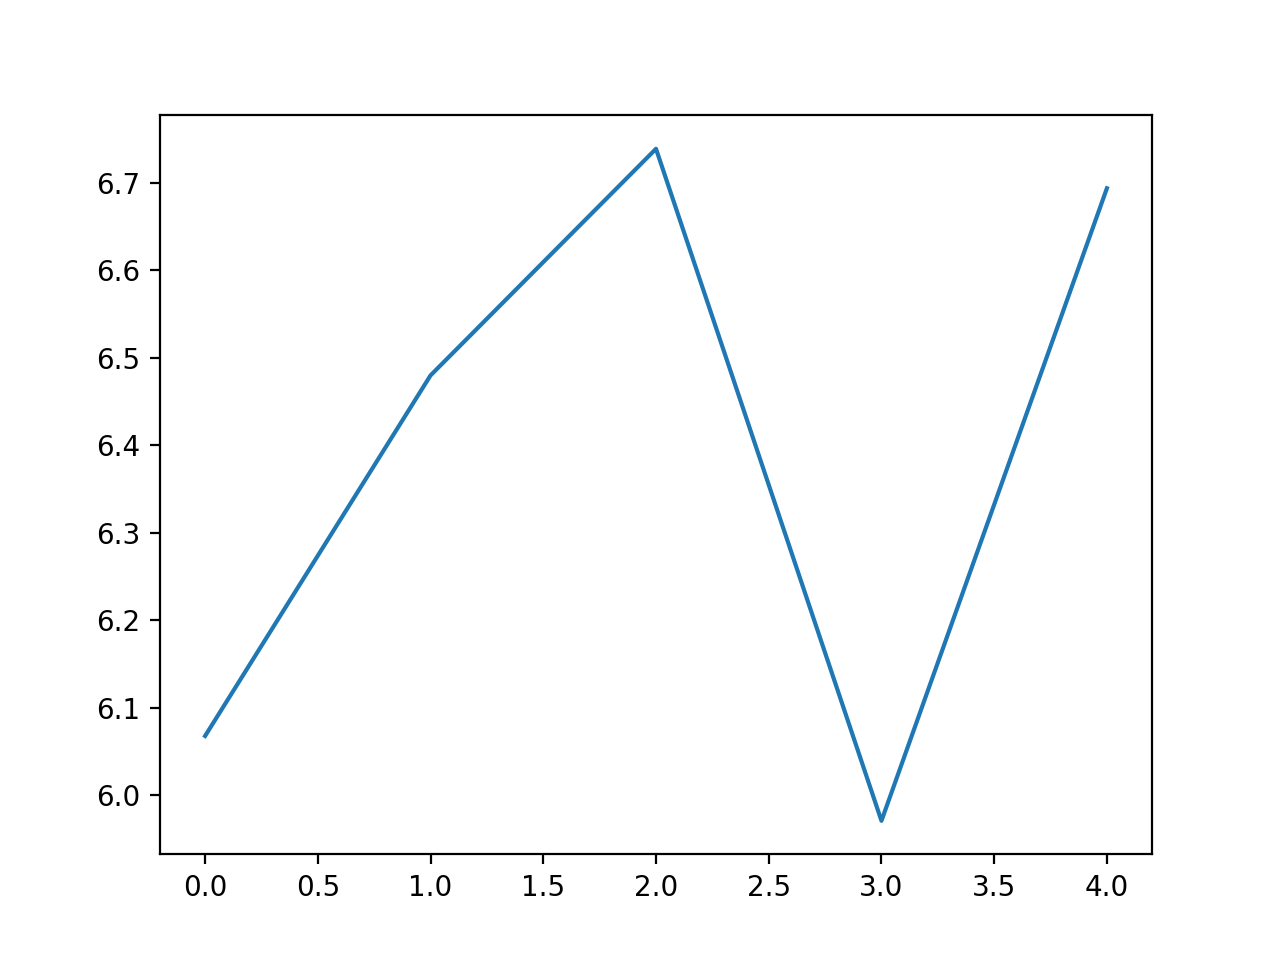

In [64]:
plt.figure()
plt.plot(all_loses_lr)


## Momentum

In [62]:
import matplotlib.pyplot as plt
%matplotlib notebook
momenta = [0.0, 0.2, 0.5, 0.7, 0.9]
lr =  1e-6
all_loses_m = []
for momentum in momenta:
    train_loader, test_loader, dataset, model, optimizer = setup_model(lr, momentum, BATCH_SIZE, HIDDEN_LAYER_SIZE, HIDDEN_LAYERS_NUM)
    losses = model.train(train_loader, optimizer, FRAME_SIZE, INPUT_DIMENSION, EPOCHS, CLIPPING_VALUE )
    print(losses)
    all_loses_m.append(losses)
print(all_loses_m)

Epoch 0, Mean loss 5.9239420890808105
Epoch 1, Mean loss 5.9246978759765625
Epoch 2, Mean loss 5.922436714172363
Epoch 3, Mean loss 5.923425674438477
Epoch 4, Mean loss 5.923223495483398
Epoch 5, Mean loss 5.923977375030518
Epoch 6, Mean loss 5.922947883605957
Epoch 7, Mean loss 5.921966552734375
Epoch 8, Mean loss 5.923525810241699
Epoch 9, Mean loss 5.9225544929504395
Epoch 10, Mean loss 5.922558307647705
Epoch 11, Mean loss 5.922723293304443
Epoch 12, Mean loss 5.922673225402832
Epoch 13, Mean loss 5.922607421875
Epoch 14, Mean loss 5.923851013183594
Epoch 15, Mean loss 5.9225568771362305
Epoch 16, Mean loss 5.923072814941406
Epoch 17, Mean loss 5.924682140350342
Epoch 18, Mean loss 5.923096179962158
Epoch 19, Mean loss 5.922374248504639
Epoch 20, Mean loss 5.922906875610352
Epoch 21, Mean loss 5.924099445343018
Epoch 22, Mean loss 5.923855781555176
Epoch 23, Mean loss 5.923771858215332
Epoch 24, Mean loss 5.9222211837768555
Epoch 25, Mean loss 5.922454357147217
Epoch 26, Mean loss 

Epoch 16, Mean loss 6.687114238739014
Epoch 17, Mean loss 6.687486171722412
Epoch 18, Mean loss 6.685511589050293
Epoch 19, Mean loss 6.686307907104492
Epoch 20, Mean loss 6.686397075653076
Epoch 21, Mean loss 6.686590194702148
Epoch 22, Mean loss 6.687167167663574
Epoch 23, Mean loss 6.687808036804199
Epoch 24, Mean loss 6.686029434204102
Epoch 25, Mean loss 6.686413764953613
Epoch 26, Mean loss 6.68764066696167
Epoch 27, Mean loss 6.687412738800049
Epoch 28, Mean loss 6.686375141143799
Epoch 29, Mean loss 6.686946392059326
Epoch 30, Mean loss 6.68606424331665
Epoch 31, Mean loss 6.686283588409424
Epoch 32, Mean loss 6.685887336730957
Epoch 33, Mean loss 6.6857805252075195
Epoch 34, Mean loss 6.687147617340088
Epoch 35, Mean loss 6.687661647796631
Epoch 36, Mean loss 6.686071872711182
Epoch 37, Mean loss 6.686368942260742
Epoch 38, Mean loss 6.685856819152832
Epoch 39, Mean loss 6.687425136566162
Epoch 40, Mean loss 6.6862473487854
Epoch 41, Mean loss 6.686507701873779
Epoch 42, Mean 

Epoch 32, Mean loss 6.692807197570801
Epoch 33, Mean loss 6.694433689117432
Epoch 34, Mean loss 6.692728042602539
Epoch 35, Mean loss 6.6924147605896
Epoch 36, Mean loss 6.694139003753662
Epoch 37, Mean loss 6.693285942077637
Epoch 38, Mean loss 6.693704128265381
Epoch 39, Mean loss 6.694572448730469
Epoch 40, Mean loss 6.693864822387695
Epoch 41, Mean loss 6.6943039894104
Epoch 42, Mean loss 6.694455146789551
Epoch 43, Mean loss 6.694330215454102
Epoch 44, Mean loss 6.694027900695801
Epoch 45, Mean loss 6.693254470825195
Epoch 46, Mean loss 6.693255424499512
Epoch 47, Mean loss 6.691593647003174
Epoch 48, Mean loss 6.691821575164795
Epoch 49, Mean loss 6.695347309112549
Epoch 50, Mean loss 6.694021224975586
Epoch 51, Mean loss 6.692526340484619
Epoch 52, Mean loss 6.693300247192383
Epoch 53, Mean loss 6.695028781890869
Epoch 54, Mean loss 6.693953037261963
Epoch 55, Mean loss 6.691653728485107
Epoch 56, Mean loss 6.693277359008789
Epoch 57, Mean loss 6.6933512687683105
Epoch 58, Mean 

In [65]:
min(all_loses_m)

[5.922116279602051]

In [66]:
5.9535813331604 > 5.935657024383545

True

<IPython.core.display.Javascript object>


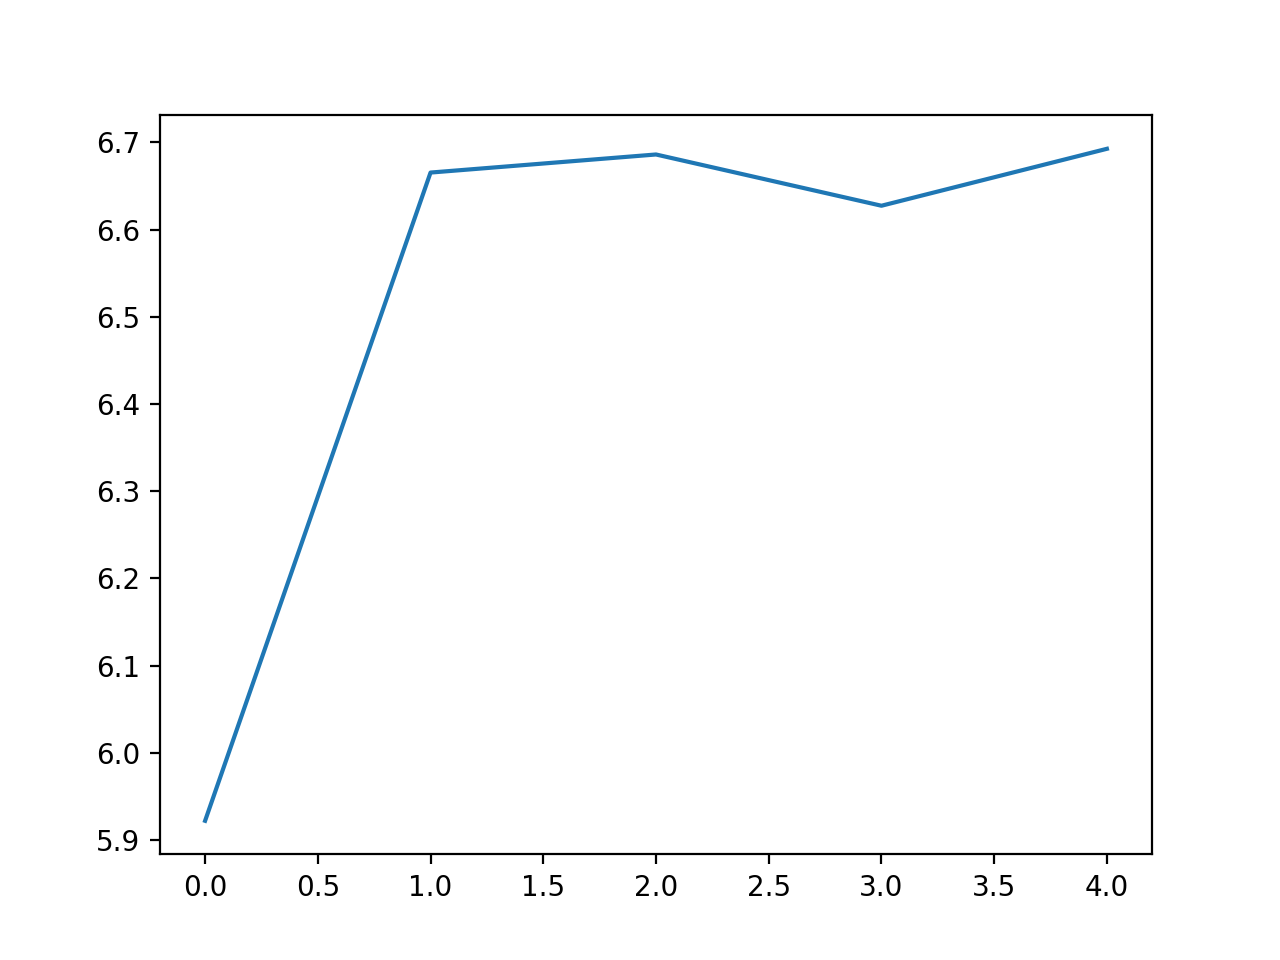

In [67]:
plt.figure()
plt.plot(all_loses_m)


## Batch size

In [94]:
import matplotlib.pyplot as plt
%matplotlib notebook
lr =  1e-8
momentum = 0.9
batch_sizes = [10, 32, 50, 128, 1024] 
all_loses_b = []
for batch_size in batch_sizes:
    train_loader, test_loader, dataset, model, optimizer = setup_model(lr, momentum, batch_size, HIDDEN_LAYER_SIZE, HIDDEN_LAYERS_NUM)
    losses = model.train(train_loader, optimizer, FRAME_SIZE, INPUT_DIMENSION, EPOCHS, CLIPPING_VALUE )
    print(losses)
    all_loses_b.append(losses)
print(all_loses_b)

Epoch 0, Mean loss 6.595037364959717
Epoch 1, Mean loss 6.5674028396606445
Epoch 2, Mean loss 6.55878210067749
Epoch 3, Mean loss 6.501078701019287
Epoch 4, Mean loss 6.510762882232666
Epoch 5, Mean loss 6.484150695800781
Epoch 6, Mean loss 6.586577987670898
Epoch 7, Mean loss 7.466937923431397
Epoch 8, Mean loss 6.471337127685547
Epoch 9, Mean loss 6.597682476043701
Epoch 10, Mean loss 7.49949369430542
Epoch 11, Mean loss 6.45253095626831
Epoch 12, Mean loss 7.4859343528747555
Epoch 13, Mean loss 6.654507732391357
Epoch 14, Mean loss 6.590918636322021
Epoch 15, Mean loss 6.509631729125976
Epoch 16, Mean loss 6.568836498260498
Epoch 17, Mean loss 6.524962711334228
Epoch 18, Mean loss 6.575191307067871
Epoch 19, Mean loss 6.471071720123291
Epoch 20, Mean loss 6.5465922355651855
Epoch 21, Mean loss 6.515738677978516
Epoch 22, Mean loss 6.5843024253845215
Epoch 23, Mean loss 6.564665222167969
Epoch 24, Mean loss 7.395727252960205
Epoch 25, Mean loss 6.510663032531738
Epoch 26, Mean loss 6

Epoch 13, Mean loss 6.6901631355285645
Epoch 14, Mean loss 6.690678119659424
Epoch 15, Mean loss 6.688586711883545
Epoch 16, Mean loss 6.688540458679199
Epoch 17, Mean loss 6.689967632293701
Epoch 18, Mean loss 6.689053535461426
Epoch 19, Mean loss 6.692681789398193
Epoch 20, Mean loss 6.689996242523193
Epoch 21, Mean loss 6.690762042999268
Epoch 22, Mean loss 6.691359043121338
Epoch 23, Mean loss 6.688019275665283
Epoch 24, Mean loss 6.6902852058410645
Epoch 25, Mean loss 6.69133186340332
Epoch 26, Mean loss 6.689582347869873
Epoch 27, Mean loss 6.690479755401611
Epoch 28, Mean loss 6.691768169403076
Epoch 29, Mean loss 6.689136981964111
Epoch 30, Mean loss 6.690040111541748
Epoch 31, Mean loss 6.689729690551758
Epoch 32, Mean loss 6.6910176277160645
Epoch 33, Mean loss 6.690422534942627
Epoch 34, Mean loss 6.690333843231201
Epoch 35, Mean loss 6.69069242477417
Epoch 36, Mean loss 6.689346790313721
Epoch 37, Mean loss 6.690856456756592
Epoch 38, Mean loss 6.690247058868408
Epoch 39, M

Epoch 28, Mean loss 6.70869779586792
Epoch 29, Mean loss 6.710705757141113
Epoch 30, Mean loss 6.709474086761475
Epoch 31, Mean loss 6.710586071014404
Epoch 32, Mean loss 6.70916748046875
Epoch 33, Mean loss 6.709516525268555
Epoch 34, Mean loss 6.709783554077148
Epoch 35, Mean loss 6.708878040313721
Epoch 36, Mean loss 6.709578037261963
Epoch 37, Mean loss 6.708424091339111
Epoch 38, Mean loss 6.709277629852295
Epoch 39, Mean loss 6.708714008331299
Epoch 40, Mean loss 6.709495544433594
Epoch 41, Mean loss 6.7100067138671875
Epoch 42, Mean loss 6.708742141723633
Epoch 43, Mean loss 6.710130214691162
Epoch 44, Mean loss 6.708728313446045
Epoch 45, Mean loss 6.708953857421875
Epoch 46, Mean loss 6.711641311645508
Epoch 47, Mean loss 6.710897922515869
Epoch 48, Mean loss 6.710061550140381
Epoch 49, Mean loss 6.709969997406006
Epoch 50, Mean loss 6.708879470825195
Epoch 51, Mean loss 6.709388732910156
Epoch 52, Mean loss 6.709223747253418
Epoch 53, Mean loss 6.709091663360596
Epoch 54, Mea

In [69]:
min(all_loses_b)

[5.80138635635376,
 9.594470977783203,
 6.175205707550049,
 5.5416059494018555,
 6.305988311767578]

In [ ]:
lr =  1e-8
momentum = 0.9
batch_size=128

# Hyper parameter Tuning using Ray Tune --- Not working

- https://github.com/ray-project/ray

- https://github.com/ray-project/ray/blob/master/python/ray/tune/examples/mnist_pytorch.py
- https://ray.readthedocs.io/en/latest/tune-usage.html

### Metrics:
#### (Optional) Mean reward for current training iteration
EPISODE_REWARD_MEAN = "episode_reward_mean"

#### (Optional) Mean loss for training iteration
MEAN_LOSS = "mean_loss"

#### (Optional) Mean accuracy for training iteration
MEAN_ACCURACY = "mean_accuracy"


In [7]:
import torch.optim as optim
import ray
from ray import tune


In [10]:
def train_ocr(config):
    
    transformation = transforms.Compose([
    transforms.ToTensor(),
    ImageTensorPadding(MAX_IMAGE_HEIGHT, MAX_IMAGE_WIDTH)
    ])
    
    train_data, test_data, dataset = load_data(base_dir = BASE_DIR, dataset_name = DATA_SET_NAME,
                                              transformation=transformation,
                                              train_test_split=TRAIN_TEST_SPLIT, batch_size=BATCH_SIZE)
    # Fixed values ( i.e.: not configurable)
    ALPHABET_SIZE = len(dataset.alphabet)
    INPUT_DIMENSION = MAX_IMAGE_HEIGHT * FRAME_SIZE
    
    # Define and train the model
    model = OCRModel(INPUT_DIMENSION, HIDDEN_LAYER_SIZE, HIDDEN_LAYERS_NUM, ALPHABET_SIZE)

    optimizer = optim.SGD(model.parameters(), lr=config["lr"], momentum=MOMENTUM)   
    
    losses = model.train(train_loader, optimizer, FRAME_SIZE, INPUT_DIMENSION, EPOCHS,CLIPPING_VALUE )
    #mean_loss = model.test(test_loader, FRAME_SIZE, INPUT_DIMENSION, dataset.alphabet)
    mean_loss = np.mean(losses)
    tune.track.log(mean_loss=mean_loss)
    
transformation = transforms.Compose([transforms.ToTensor(),
                                     ImageTensorPadding(MAX_IMAGE_HEIGHT, MAX_IMAGE_WIDTH)])

train_loader, test_loader, dataset = load_data(base_dir = BASE_DIR, dataset_name = DATA_SET_NAME,
                                          transformation=transformation,
                                          train_test_split=TRAIN_TEST_SPLIT, batch_size=BATCH_SIZE)

# Fixed values ( i.e.: not configurable)
ALPHABET_SIZE = len(dataset.alphabet)
INPUT_DIMENSION = MAX_IMAGE_HEIGHT * FRAME_SIZE
    
analysis = tune.run(
    train_ocr,  
    config={
        "lr": tune.uniform(0.001, 0.1)#tune.sample_from(lambda spec: 10**(-10 * np.random.rand()))
#         "momentum": tune.uniform(0.1, 0.9)
    })

# print("Best config: ", analysis.get_best_config(metric="mean_loss"))

# # Get a dataframe for analyzing trial results.
# df = analysis.dataframe()


2019-12-22 22:04:24,583	INFO function_runner.py:254 -- tune.track signature detected.
2019-12-22 22:04:24,605	WARNING logger.py:413 -- Could not instantiate tf2_compat_logger: No module named 'tensorflow'.
2019-12-22 22:04:24,610	INFO ray_trial_executor.py:121 -- Trial train_ocr_a1f9d82c: Setting up new remote runner.


Trial name,status,loc,lr
train_ocr_a1f9d82c,RUNNING,,


2019-12-22 22:04:25,341	ERROR trial_runner.py:482 -- Error processing event.
Traceback (most recent call last):
  File "/anaconda2/envs/pmlpy3.7/lib/python3.7/site-packages/ray/tune/trial_runner.py", line 426, in _process_trial
    result = self.trial_executor.fetch_result(trial)
  File "/anaconda2/envs/pmlpy3.7/lib/python3.7/site-packages/ray/tune/ray_trial_executor.py", line 378, in fetch_result
    result = ray.get(trial_future[0], DEFAULT_GET_TIMEOUT)
  File "/anaconda2/envs/pmlpy3.7/lib/python3.7/site-packages/ray/worker.py", line 1457, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TypeError): ray::TemporaryActor.__init__() (pid=75116, ip=192.168.1.4)
  File "python/ray/_raylet.pyx", line 626, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 633, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 634, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 636, in ray._raylet.execute_task
  File "python/ray/_rayl

TuneError: ('Trials did not complete', [train_ocr_a1f9d82c])

(pid=75116) 2019-12-22 22:04:25,336	ERROR function_manager.py:705 -- Failed to load actor class %s.
(pid=75116) Traceback (most recent call last):
(pid=75116)   File "/anaconda2/envs/pmlpy3.7/lib/python3.7/site-packages/ray/function_manager.py", line 702, in _load_actor_class_from_gcs
(pid=75116)     actor_class = pickle.loads(pickled_class)
(pid=75116) ModuleNotFoundError: No module named 'ocr_data_set'


In [84]:
print( "============== Infer train data")
for batch in enumerate(train_data):
    
    true_texts = batch[1]['text']
    predicted_texts = model.infer(batch[1]['image'], FRAME_SIZE, INPUT_DIMENSION, dataset.alphabet)
    
    for i in range(0, len(true_texts)):
        final_text = clean_text(predicted_texts[i])
        
        print("Original Text:   {} \nPredicted Text:  {} \n".format(true_texts[i], final_text ))

============== Infer train data
Original Text:   Vp maenendaygh hoyrt mych vortan 
Predicted Text:  VvdjTdGZyNzyNhzſjqgTGpghpoDJguBmfrncWE 

Original Text:   Wayr ſach ye mynſche des gelychs 
Predicted Text:  vNgdmſGmdJqfJdJadNdpdBVOfnclW 

Original Text:   Wye byllych wyr layſſen ſulden 
Predicted Text:  qMqmgwgZlGVOiG NtBtgZhzlJqẽNtpjnce·d 

Original Text:   Byrnhoultz vyll zo backen ind bruwen dat gemall 
Predicted Text:  vTjstjsVTcOZBwrcr VmclcmdBfBliexZx iqOGSGZ·pcwBoqOqWWſ 

Original Text:   Jnd leder vur ſchoyn zo maychen in der noyt 
Predicted Text:  lZmbtdNWA tgtuGgJgJG Wa·rqBiqZsBqVmOgBJBvSBnrAſ 

Original Text:   Der ſtoultze hertzongh van brabant 
Predicted Text:  lmdglJviJlvBJNBvjZgqWdvgoGZNZdtuJpqAjnre 

Original Text:   Jnd ſynre lieuer moeder ſpreckt myt myr 
Predicted Text:  MVWDmD mZcZhJqmpgdBgcgJkNzJhdJhTpjsAZTVZSrnce  

Original Text:   Man hoerd dayr vyll iamers claegen 
Predicted Text:  sg qBwTtNJlTqnimqliZviqOWqOJvBone· 

Original Text:   Eyn der iſt dem andren v

In [95]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=MOMENTUM)

losses = model.train(train_data, optimizer, FRAME_SIZE, INPUT_DIMENSION, 1000,CLIPPING_VALUE )


Epoch 0, Mean loss 6.6529035568237305
Epoch 1, Mean loss 6.651936054229736
Epoch 2, Mean loss 6.652703762054443
Epoch 3, Mean loss 6.65189790725708
Epoch 4, Mean loss 6.652111530303955
Epoch 5, Mean loss 6.649375915527344
Epoch 6, Mean loss 6.649653911590576
Epoch 7, Mean loss 6.649810314178467
Epoch 8, Mean loss 6.648567199707031
Epoch 9, Mean loss 6.647593975067139
Epoch 10, Mean loss 6.646278381347656
Epoch 11, Mean loss 6.645997524261475
Epoch 12, Mean loss 6.645219326019287
Epoch 13, Mean loss 6.642765522003174
Epoch 14, Mean loss 6.6420488357543945
Epoch 15, Mean loss 6.64113187789917
Epoch 16, Mean loss 6.639631271362305
Epoch 17, Mean loss 6.639087200164795
Epoch 18, Mean loss 6.637712001800537
Epoch 19, Mean loss 6.638746738433838
Epoch 20, Mean loss 6.635751724243164


KeyboardInterrupt: 

In [96]:
for batch in enumerate(train_data):
    
    true_texts = batch[1]['text']
    predicted_texts = model.infer(batch[1]['image'], FRAME_SIZE, INPUT_DIMENSION, dataset.alphabet)
    
    for i in range(0, len(true_texts)):
        final_text = clean_text(predicted_texts[i])
        
        print("Original Text:   {} \nPredicted Text:  {} \n".format(true_texts[i], final_text ))

Original Text:   Vnd den furſten des hylgen rijchs 
Predicted Text:  SZkAiMyoDuNOq MyNyxcqxaqdAbqNDreGEn 

Original Text:   Jnd dat dye froemen criſten ſteed alſamen 
Predicted Text:  h·EẽfoVm ogzqDqgWjkAgWOfy DjẽANOkrcreGEn 

Original Text:   En deed der ſunder troeſterijn 
Predicted Text:  Z·oZAdA gqAVATqA AẽOkAONOaen 

Original Text:   Off anders wayr · myr nyet dayr in zo verkeren 
Predicted Text:  ZSJZEjmkamebTmN mo mguVtAuq Tq EAgltm nyOfyv yaenl 

Original Text:   Nu wyll ich frund vort layſſen ſtayn myn reden 
Predicted Text:  Joxht ykjebuN Bbwzq dltmg EwTtElẽTqO jgrduZgGẽ aen 

Original Text:   Myt gudẽ hertzen dayr zu ſayſſen 
Predicted Text:  OyooVqAuVD ogoVA VTqA ukTAkAaeGtG 

Original Text:   Jghlygh parthij was belaeden 
Predicted Text:  JkxkADADADTAqVd·VDA feGen 

Original Text:   Gud gereytſcafft dayr myt man puluer machen ſall 
Predicted Text:  ZkOkZqZfmEſfEſflmN T glz TeTmNjqrqrNrquJrenupn 

Original Text:   Vredens gebruychen moegen in gaedes namen 
Predicted Text:  